In [78]:
words = open('names.txt', 'r').read().splitlines()

In [79]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [80]:
len(words)

32033

In [81]:
min(len(w) for w in words)

2

In [82]:
max(len(w) for w in words)

15

In [83]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [84]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [85]:
import torch

In [86]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [87]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [88]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

In [89]:
total = N.sum()
total

tensor(228146)

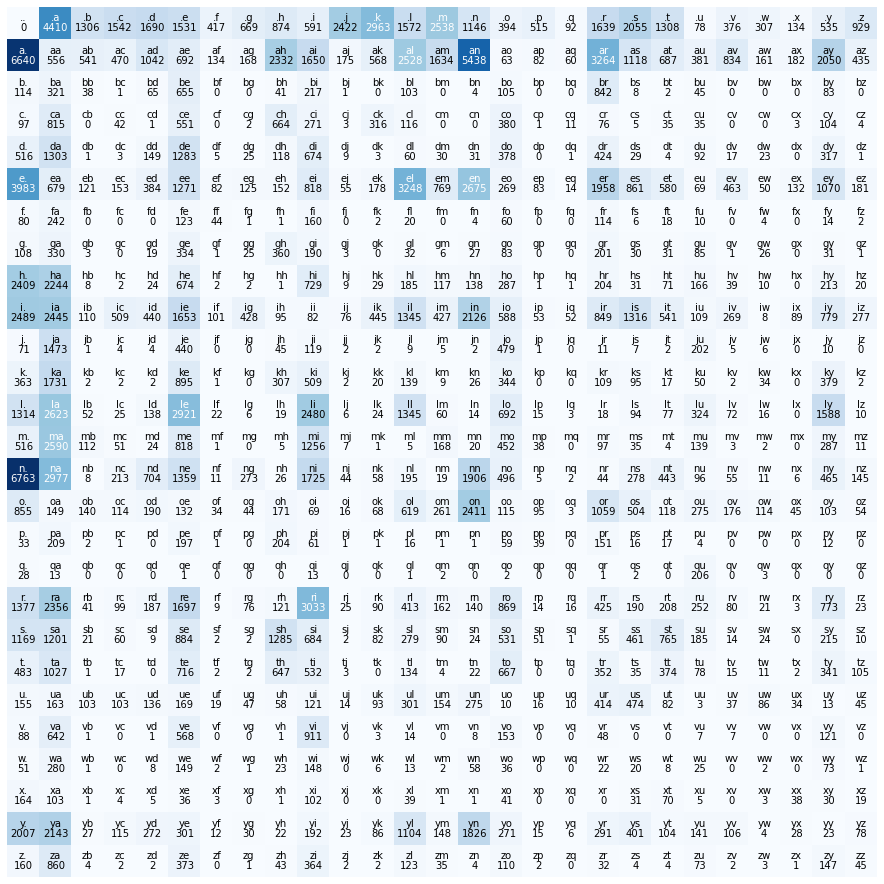

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16,16))
im = plt.imshow(N, cmap='Blues')
total = N.sum()
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        color = 'white' if N[i, j] / total > 0.011 else 'black'
        plt.text(j, i, chstr, ha="center", va="bottom", color=color)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color=color)
plt.axis('off');

In [91]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [92]:
p = N[0]
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [93]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [94]:
g = torch.Generator().manual_seed(2147483647)
p3 = torch.rand(3, generator=g)
p3 = p / p.sum()
p3

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [95]:
samples = torch.multinomial(p3, num_samples=100, replacement=True, generator=g)
samples

tensor([18, 14, 20,  5,  3, 20, 15, 20, 11, 10, 10, 14, 19, 12,  5, 13, 14,  1,
        11, 18, 11, 22, 10, 10, 14,  1, 11, 13,  1,  4,  4, 13, 19, 18, 10, 18,
        19,  8,  1, 13, 19, 13,  2, 19, 19,  4, 18, 18, 10, 21,  5,  1,  2,  8,
        11, 10,  2,  8, 12,  1, 19, 19, 11,  4, 11,  5,  1,  9,  2, 11, 19,  2,
        12, 19, 10,  1, 11, 12,  1,  1,  1, 18, 26,  3, 12,  1,  2,  1, 11, 20,
        10,  2, 20,  9, 18, 12, 10, 14, 12, 18])

In [96]:
# should be close to the p3 distribution
print(f'{samples.shape=}')
print(f'{samples[samples == 0].shape=}')
print(f'{samples[samples == 1].shape=}')
print(f'{samples[samples == 2].shape=}')


samples.shape=torch.Size([100])
samples[samples == 0].shape=torch.Size([0])
samples[samples == 1].shape=torch.Size([13])
samples[samples == 2].shape=torch.Size([7])


In [97]:
p3.shape

torch.Size([27])

In [98]:
N.shape

torch.Size([27, 27])

In [99]:
N.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [100]:
# 27, 27
# 27,  1

In [101]:
# don't do this, this produce sum of rows indeed, but it got broadcasted to a row vector.
N.sum(1).shape

torch.Size([27])

In [102]:
# 27, 27
#  1, 27 <- broadcasted to a row vector, not what we want

In [103]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [104]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [105]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)
# log((a*b*c)^(1/3)) = (log(a) + log(b) + log(c)) / 3

In [106]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}') # the NN approach below should match this at least

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


In [107]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [108]:
xs

tensor([ 0,  5, 13, 13,  1])

In [109]:
ys

tensor([ 5, 13, 13,  1,  0])

In [110]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [111]:
xenc.shape

torch.Size([5, 27])

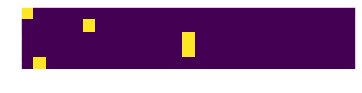

In [112]:
plt.imshow(xenc)

In [113]:
xenc.dtype

torch.float32

In [114]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.3500, -1.9109, -0.6096,  0.9143,  0.1946, -0.0843, -0.3187,  0.3471,
          0.8554,  0.1498,  0.2328, -0.4266,  2.0048,  0.5158,  0.5799,  1.3264,
         -0.1686,  0.0216,  1.2753, -0.8960,  0.9474,  0.2956, -1.6600,  1.2357,
          0.0969, -0.7369,  1.6964],
        [-0.2532, -0.1738, -0.1540, -0.8821,  0.6744, -0.2230, -0.8505,  0.7648,
         -0.1083, -0.9961, -0.8795,  0.7086, -0.5418, -0.0322, -0.0627,  0.4435,
         -0.1459,  0.7495, -0.5866,  0.6792, -0.8541, -1.6013, -0.5555, -0.4422,
          0.3674, -1.1055,  0.6642],
        [-1.3025, -0.5429, -1.1470, -0.1438, -0.0455, -0.2253,  0.5150, -0.9221,
         -0.4588,  1.1600,  1.1581,  0.2246, -0.7295, -0.7281,  1.1122,  0.0801,
          0.0380, -0.4455, -0.3190, -0.8682,  1.3126, -1.1515, -0.1285, -0.7502,
         -0.5287,  0.5768, -0.9625],
        [-1.3025, -0.5429, -1.1470, -0.1438, -0.0455, -0.2253,  0.5150, -0.9221,
         -0.4588,  1.1600,  1.1581,  0.2246, -0.7295, -0.7281,  1.1122,  0.0801

In [115]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0145, 0.0030, 0.0112, 0.0512, 0.0249, 0.0189, 0.0149, 0.0291, 0.0483,
         0.0239, 0.0259, 0.0134, 0.1525, 0.0344, 0.0367, 0.0774, 0.0174, 0.0210,
         0.0735, 0.0084, 0.0530, 0.0276, 0.0039, 0.0707, 0.0226, 0.0098, 0.1120],
        [0.0287, 0.0311, 0.0317, 0.0153, 0.0725, 0.0296, 0.0158, 0.0794, 0.0332,
         0.0136, 0.0153, 0.0751, 0.0215, 0.0358, 0.0347, 0.0576, 0.0319, 0.0782,
         0.0206, 0.0729, 0.0157, 0.0075, 0.0212, 0.0237, 0.0534, 0.0122, 0.0718],
        [0.0090, 0.0193, 0.0105, 0.0287, 0.0317, 0.0265, 0.0555, 0.0132, 0.0209,
         0.1057, 0.1055, 0.0415, 0.0160, 0.0160, 0.1008, 0.0359, 0.0344, 0.0212,
         0.0241, 0.0139, 0.1232, 0.0105, 0.0291, 0.0157, 0.0195, 0.0590, 0.0127],
        [0.0090, 0.0193, 0.0105, 0.0287, 0.0317, 0.0265, 0.0555, 0.0132, 0.0209,
         0.1057, 0.1055, 0.0415, 0.0160, 0.0160, 0.1008, 0.0359, 0.0344, 0.0212,
         0.0241, 0.0139, 0.1232, 0.0105, 0.0291, 0.0157, 0.0195, 0.0590, 0.0127],
        [0.0046, 0.0674,

In [116]:
counts

tensor([[0.7047, 0.1480, 0.5436, 2.4950, 1.2148, 0.9192, 0.7271, 1.4150, 2.3522,
         1.1616, 1.2622, 0.6527, 7.4250, 1.6750, 1.7859, 3.7674, 0.8449, 1.0218,
         3.5798, 0.4082, 2.5790, 1.3440, 0.1901, 3.4408, 1.1018, 0.4786, 5.4545],
        [0.7763, 0.8405, 0.8573, 0.4139, 1.9629, 0.8001, 0.4272, 2.1485, 0.8974,
         0.3693, 0.4150, 2.0311, 0.5817, 0.9683, 0.9392, 1.5582, 0.8643, 2.1159,
         0.5562, 1.9724, 0.4257, 0.2016, 0.5738, 0.6426, 1.4439, 0.3310, 1.9430],
        [0.2719, 0.5811, 0.3176, 0.8661, 0.9556, 0.7983, 1.6737, 0.3977, 0.6320,
         3.1899, 3.1838, 1.2519, 0.4822, 0.4828, 3.0410, 1.0834, 1.0387, 0.6405,
         0.7269, 0.4197, 3.7160, 0.3161, 0.8794, 0.4723, 0.5894, 1.7804, 0.3819],
        [0.2719, 0.5811, 0.3176, 0.8661, 0.9556, 0.7983, 1.6737, 0.3977, 0.6320,
         3.1899, 3.1838, 1.2519, 0.4822, 0.4828, 3.0410, 1.0834, 1.0387, 0.6405,
         0.7269, 0.4197, 3.7160, 0.3161, 0.8794, 0.4723, 0.5894, 1.7804, 0.3819],
        [0.1548, 2.2458,

In [117]:
probs[0]

tensor([0.0145, 0.0030, 0.0112, 0.0512, 0.0249, 0.0189, 0.0149, 0.0291, 0.0483,
        0.0239, 0.0259, 0.0134, 0.1525, 0.0344, 0.0367, 0.0774, 0.0174, 0.0210,
        0.0735, 0.0084, 0.0530, 0.0276, 0.0039, 0.0707, 0.0226, 0.0098, 0.1120])

In [118]:
probs[0].shape

torch.Size([27])

In [119]:
probs[0].sum()

tensor(1.0000)

In [120]:
# (5, 27) @ (27, 27) -> (5, 27)

In [121]:
# SUMMARY ------------------------------>>>>

In [122]:
xs

tensor([ 0,  5, 13, 13,  1])

In [123]:
ys

tensor([ 5, 13, 13,  1,  0])

In [124]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [125]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [126]:
probs.shape

torch.Size([5, 27])

In [127]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [128]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [129]:
xs

tensor([ 0,  5, 13, 13,  1])

In [130]:
ys

tensor([ 5, 13, 13,  1,  0])

In [131]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [132]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [133]:
print(loss.item())

3.7693049907684326


In [134]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [135]:
W.data += -0.1 * W.grad

In [136]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [218]:
# create the bigram dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [138]:
# run the previous cell multiple times will not change the generated weights
# because the random generator is always initialized with the same seed
# but if we call `W = torch.randn((27, 27), generator=g, requires_grad=True)` multiple times
# then we will get different weights each time. Think of a torch.Generator as a a random number
# producer that produces a sequence of random numbers. The sequence is always the same.
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [217]:
def train(W, xs, ys, lr=0.1, epochs=10):
  for epoch in range(epochs):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    xenc = xenc.view(xenc.shape[0], -1) # reshape to (num_examples, 27*num_chars_per_example)
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(probs.shape[0]), ys].log().mean() + 0.001 * (W**2).sum()
    print(f'epoch {epoch+1} loss: {loss.item()}')
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    # update weights
    W.data += -lr * W.grad

In [224]:
train(W, xs, ys, lr=10, epochs=100)

epoch 1 loss: 2.8387253284454346
epoch 2 loss: 2.8387253284454346
epoch 3 loss: 2.8387253284454346
epoch 4 loss: 2.8387253284454346
epoch 5 loss: 2.8387253284454346
epoch 6 loss: 2.8387253284454346
epoch 7 loss: 2.8387253284454346
epoch 8 loss: 2.8387253284454346
epoch 9 loss: 2.8387253284454346
epoch 10 loss: 2.8387253284454346
epoch 11 loss: 2.8387253284454346
epoch 12 loss: 2.8387253284454346
epoch 13 loss: 2.8387253284454346
epoch 14 loss: 2.8387253284454346
epoch 15 loss: 2.8387253284454346
epoch 16 loss: 2.8387253284454346
epoch 17 loss: 2.8387253284454346
epoch 18 loss: 2.8387253284454346
epoch 19 loss: 2.8387253284454346
epoch 20 loss: 2.8387253284454346
epoch 21 loss: 2.8387253284454346
epoch 22 loss: 2.8387253284454346
epoch 23 loss: 2.8387253284454346
epoch 24 loss: 2.8387253284454346
epoch 25 loss: 2.8387253284454346
epoch 26 loss: 2.8387253284454346
epoch 27 loss: 2.8387253284454346
epoch 28 loss: 2.8387253284454346
epoch 29 loss: 2.8387253284454346
epoch 30 loss: 2.838725

In [180]:
g = torch.Generator().manual_seed(2147483647)


def sample(W, num_samples):
  for i in range(num_samples):
    out = []
    ix = [0] * (W.shape[0] // 27)
    while True:
      # ---------- !!! NEW !!! --------------
      # BEFORE:
      # p = P[ix]
      # ----------
      # NOW:
      xenc = F.one_hot(torch.tensor(ix), num_classes=27).float()
      xenc = xenc.view(1, -1) # reshape to (1, 27*num_chars_per_example)
      logits = xenc @ W  # predict log-counts
      counts = logits.exp()  # counts, equivalent to N
      p = counts / counts.sum(
        1, keepdims=True
      )  # probabilities for next character
      # ----------
      new_ix = torch.multinomial(
        p, num_samples=1, replacement=True, generator=g
      ).item()
      ix = ix[1:] + [new_ix]
      out.append(itos[new_ix])
      if new_ix == 0:
        break
    print(
        "".join(out)
    )  # this prints out almost the same 5 words as the cooccurrence matrix model above

In [225]:
sample(W, 5)

jjgla.
sadvqrkpkixiydavczolgnrisgebe.
ka.
nn.
jo.


In [143]:
for w in ['zanqi']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    logprob = torch.log(prob)
    print(f'{ch1}{ch2}: {p[0, ix2].item():.4f} {logprob:.4f}')



.z: 0.0755 -1.4788
za: 0.0710 -1.4788
an: 0.0586 -1.4788
nq: 0.0040 -1.4788
qi: 0.0388 -1.4788
i.: 0.0446 -1.4788


E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [226]:
# create the trigram dataset
xs_2, ys_2 = [], []
for w in words:
  chs = ['.', '.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs_2.append([ix1, ix2])
    ys_2.append(ix3)
xs_2 = torch.tensor(xs_2)
ys_2 = torch.tensor(ys_2)
num = xs_2.shape[0]
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W2 = torch.randn((27*2, 27), generator=g, requires_grad=True)

number of examples:  228146


In [231]:
train(W2, xs_2, ys_2, lr=10, epochs=100) # the loss is lower than the bigram model

epoch 1 loss: 2.6899585723876953
epoch 2 loss: 2.6899585723876953
epoch 3 loss: 2.6899585723876953
epoch 4 loss: 2.6899585723876953
epoch 5 loss: 2.6899585723876953
epoch 6 loss: 2.6899585723876953
epoch 7 loss: 2.6899588108062744
epoch 8 loss: 2.6899588108062744
epoch 9 loss: 2.6899588108062744
epoch 10 loss: 2.6899588108062744
epoch 11 loss: 2.6899588108062744
epoch 12 loss: 2.6899585723876953
epoch 13 loss: 2.6899585723876953
epoch 14 loss: 2.6899585723876953
epoch 15 loss: 2.6899585723876953
epoch 16 loss: 2.6899585723876953
epoch 17 loss: 2.6899585723876953
epoch 18 loss: 2.6899585723876953
epoch 19 loss: 2.6899585723876953
epoch 20 loss: 2.6899588108062744
epoch 21 loss: 2.6899588108062744
epoch 22 loss: 2.689958333969116
epoch 23 loss: 2.689958333969116
epoch 24 loss: 2.689958333969116
epoch 25 loss: 2.689958333969116
epoch 26 loss: 2.689958333969116
epoch 27 loss: 2.689958333969116
epoch 28 loss: 2.6899585723876953
epoch 29 loss: 2.6899585723876953
epoch 30 loss: 2.689958572387

In [233]:
sample(W2, 5)

lesea.
ra.
iel.
mayoniw.
zotce.


In [216]:
sample(W, 5)

jqpon.
ma.
azgkaisteney.
viy.
slajaishelyl.


E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [234]:
xs.shape


torch.Size([228146])

In [236]:
xs_2.shape

torch.Size([228146, 2])